In [2]:
%pip install textblob


import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score , recall_score , f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.neighbors import NearestNeighbors


#as textblob was not already installed in jupyter libraries , we had to pip install it 


Note: you may need to restart the kernel to use updated packages.


In [2]:

! git clone https://github.com/NicolasHug/Surprise.git
%cd Surprise
! pip install -r requirements.txt
! pip install . 
! pip install surprise
# %cd C:\Users\meher\OneDrive\Desktop\code\secy recruitment

#coming back to home directory after installing surprise 


c:\Users\meher\OneDrive\Desktop\code\secy recruitment\Surprise


fatal: destination path 'Surprise' already exists and is not an empty directory.
c:\Users\meher\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


^C
Processing c:\users\meher\onedrive\desktop\code\secy recruitment\surprise
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build scikit-surprise


  error: subprocess-exited-with-error
  
  × Building wheel for scikit-surprise (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [178 lines of output]
      running bdist_wheel
      running build
      running build_py
      copying surprise\accuracy.py -> build\lib.win-amd64-cpython-312\surprise
      copying surprise\builtin_datasets.py -> build\lib.win-amd64-cpython-312\surprise
      copying surprise\dataset.py -> build\lib.win-amd64-cpython-312\surprise
      copying surprise\dump.py -> build\lib.win-amd64-cpython-312\surprise
      copying surprise\reader.py -> build\lib.win-amd64-cpython-312\surprise
      copying surprise\trainset.py -> build\lib.win-amd64-cpython-312\surprise
      copying surprise\utils.py -> build\lib.win-amd64-cpython-312\surprise
      copying surprise\__init__.py -> build\lib.win-amd64-cpython-312\surprise
      copying surprise\__main__.py -> build\lib.win-amd64-cpython-312\surprise
      copying surprise\model_selection\search.py -> bu

In [ ]:

#ERROR:
#ERROR: Failed building wheel for scikit-surprise
#ERROR: Could not build wheels for scikit-surprise, which is required to install pyproject.toml-based projects
#ERROR: Invalid requirement: '#' , thus we cant write # next to wherever we are installing packages 

#Attempts to remove error
#%pip install numpy scipy joblib # a depedency that might help install surprise as i keep getting the error 
# %pip install pipwin
# %pipwin install scikit-surprise
#trying to use pipwin to install the appropriate build for my operating system and specific version of Python.
#... ERROR: Could not build wheels for scikit-surprise, which is required to install pyproject.toml-based projects
# note: This error originates from a subprocess, and is likely not a problem with pip.thus pipwin did not help

#SOLUTION:
#cloning the Surprise GitHub repository ,navigate to the Surprise directory using the %cd magic command,
#install dependencies using the !pip install command.Finally, installed Surprise from the source directory using the !pip install command

In [ ]:

from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy




#ModuleNotFoundError   however , it is still giving this error , which means the collabarator2() function wont work


ImportError: cannot import name 'similarities' from partially initialized module 'surprise' (most likely due to a circular import) (c:\Users\meher\OneDrive\Desktop\code\secy recruitment\Surprise\surprise\__init__.py)

In [3]:
# Load the datasets , which i easily can as they are stored in the same folder as my code 
movies_metadata = pd.read_csv('movies_metadata.csv', low_memory=False)
keywords = pd.read_csv('keywords.csv')
credits = pd.read_csv('credits.csv')
links = pd.read_csv('links_small.csv')
links_small = pd.read_csv('links.csv')
ratings_small = pd.read_csv('ratings.csv')
ratings = pd.read_csv('ratings_small.csv')


# Function to sample 10% of the data
def sample_data(df, frac=0.1, random_state=42):
    return df.sample(frac=frac, random_state=random_state)

# Sample 10% of each dataset
movies_metadata_sampled = sample_data(movies_metadata)
keywords_sampled = sample_data(keywords)
credits_sampled = sample_data(credits)
links_sampled = sample_data(links)
links_small_sampled = sample_data(links_small)
ratings_sampled = sample_data(ratings)
ratings_small_sampled = sample_data(ratings_small)

In [4]:
# Handling missing values in critical columns
movies_metadata = movies_metadata.dropna(subset=['title', 'id'])
movies_metadata['overview'] = movies_metadata['overview'].fillna('')

In [5]:
# Convert ids to integers so that data can be merged
movies_metadata['id'] = movies_metadata['id'].astype(int)
keywords['id'] = keywords['id'].astype(int)
credits['id'] = credits['id'].astype(int)

# Merging datasets on 'id'
merged_data = movies_metadata.merge(credits, on='id').merge(keywords, on='id')

# Merging with links also on 'id'
merged_data = merged_data.merge(links, left_on='id', right_on='tmdbId')

print(merged_data.head())

   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497         

In [6]:
# Example EDA
print(movies_metadata.info()) 
#This provides a concise summary of the DataFrame, including the number of non-null entries in each column,
# the data type of each column, and the memory usage of the DataFrame which helps to define what models can ml models can be applied on it , as they all expect different datatypes 
print(movies_metadata.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 45460 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45460 non-null  object 
 1   belongs_to_collection  4490 non-null   object 
 2   budget                 45460 non-null  object 
 3   genres                 45460 non-null  object 
 4   homepage               7778 non-null   object 
 5   id                     45460 non-null  int32  
 6   imdb_id                45443 non-null  object 
 7   original_language      45449 non-null  object 
 8   original_title         45460 non-null  object 
 9   overview               45460 non-null  object 
 10  popularity             45460 non-null  object 
 11  poster_path            45077 non-null  object 
 12  production_companies   45460 non-null  object 
 13  production_countries   45460 non-null  object 
 14  release_date           45376 non-null  object 
 15  revenue

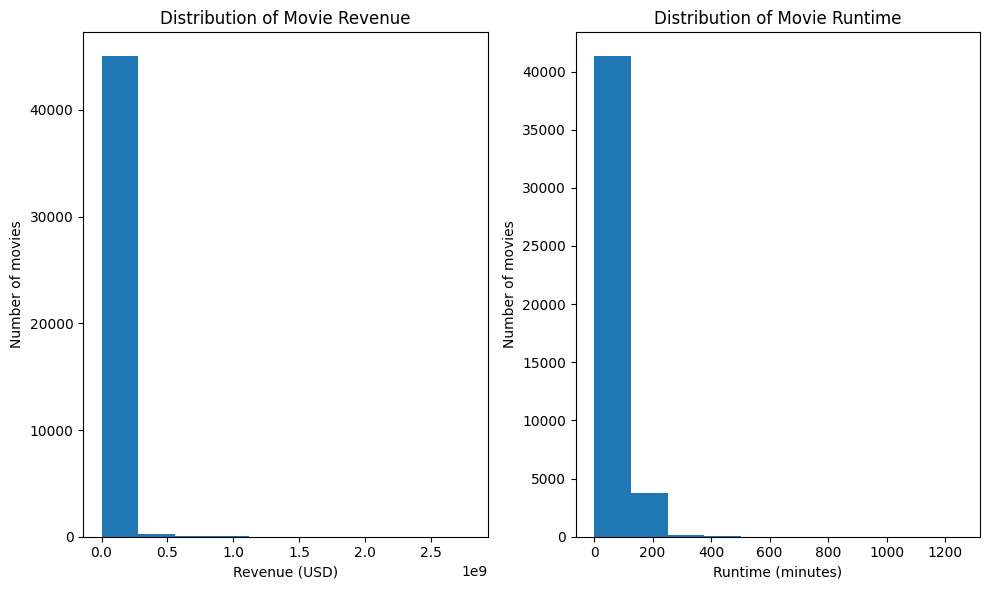

In [7]:
##if the else condition works , I know there is something wrong with my preprocessing
#helps us to visualise how much revenue and runtime has been generated by each movie . It gives us an idea of data distribution  
if 'revenue' in movies_metadata.columns and 'runtime' in movies_metadata.columns:
    plt.figure(figsize=(10, 6))

    plt.subplot(1, 2, 1)
    plt.hist(movies_metadata['revenue'])
    plt.xlabel('Revenue (USD)')
    plt.ylabel('Number of movies')
    plt.title('Distribution of Movie Revenue')

    plt.subplot(1, 2, 2)
    plt.hist(movies_metadata['runtime'])
    plt.xlabel('Runtime (minutes)')
    plt.ylabel('Number of movies')
    plt.title('Distribution of Movie Runtime')

    plt.tight_layout()
    plt.show()
else:
    print("Columns 'revenue' or 'runtime' are missing. Skipping histograms.")

In [8]:
# Average vote average by genre (if applicable) , helps in ranking the highest watched genre . 
#We can give more weighhtage to this genre while recommending movies 
if 'genres' in movies_metadata.columns and 'vote_average' in movies_metadata.columns:
    # Impute missing values (replace with your preferred imputation method)
    imputed_movies_metadata = movies_metadata.fillna(method='ffill')  # Example using forward fill
    # Group by genres and calculate average vote
    genre_groups = imputed_movies_metadata.groupby('genres')['vote_average'].mean()
    print("\nAverage vote average by genre:")
    print(genre_groups.sort_values(ascending=False))  # Sort by highest average
    # Find the movie with the most votes
    movie_with_most_votes = imputed_movies_metadata.loc[imputed_movies_metadata['vote_count'].idxmax()]
    print(f"the most popular movie is :                              " ,movie_with_most_votes)

else:
    print("Columns 'genres' or 'vote_average' are missing. Skipping average vote average by genre.")



Average vote average by genre:
genres
[{'id': 35, 'name': 'Comedy'}, {'id': 99, 'name': 'Documentary'}, {'id': 10402, 'name': 'Music'}, {'id': 10770, 'name': 'TV Movie'}]                               10.0
[{'id': 10749, 'name': 'Romance'}, {'id': 12, 'name': 'Adventure'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}]                                      10.0
[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]      10.0
[{'id': 10752, 'name': 'War'}, {'id': 16, 'name': 'Animation'}, {'id': 12, 'name': 'Adventure'}]                                                                   10.0
[{'id': 35, 'name': 'Comedy'}, {'id': 16, 'name': 'Animation'}, {'id': 18, 'name': 'Drama'}]                                                                        9.4
                                                                                                                         

C:\Users\meher\AppData\Local\Temp\ipykernel_23524\2463532695.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  imputed_movies_metadata = movies_metadata.fillna(method='ffill')  # Example using forward fill
C:\Users\meher\AppData\Local\Temp\ipykernel_23524\2463532695.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  imputed_movies_metadata = movies_metadata.fillna(method='ffill')  # Example using forward fill


In [9]:
# Calculate popularity score based on vote counts
popularity_score = ratings.groupby('movieId')['rating'].count().reset_index(name='popularity')

# Merge popularity score with ratings data , so that we can use this to further add weight to movies with good rating and popularity
ratings = ratings.merge(popularity_score, on='movieId')


In [11]:

# Basic sentiment analysis on overview so that moovies with more positive reviews get more weightage while prediction 
#also didnt use bayesian , becuase it is too complex and time consuming for just a simple sentiment analysis 
def basic_sentiment(text):
  blob = TextBlob(text)  # Pass the text argument
  sentiment = blob.sentiment.polarity
  if sentiment > 0:
    return 'Positive'
  elif sentiment < 0:
    return 'Negative'
  else:
    return 'Neutral'


#Ensure 'overview' column has no NaN values by filling them with an empty string ensuring
#that every entry in the overview column is a string, which avoids the TypeError when TextBlob processes the text.
movies_metadata['overview'] = movies_metadata['overview'].fillna('')
movies_metadata['sentiment'] = movies_metadata['overview'].apply(basic_sentiment)
sentiment_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
movies_metadata['sentiment_score'] = movies_metadata['sentiment'].map(sentiment_map)


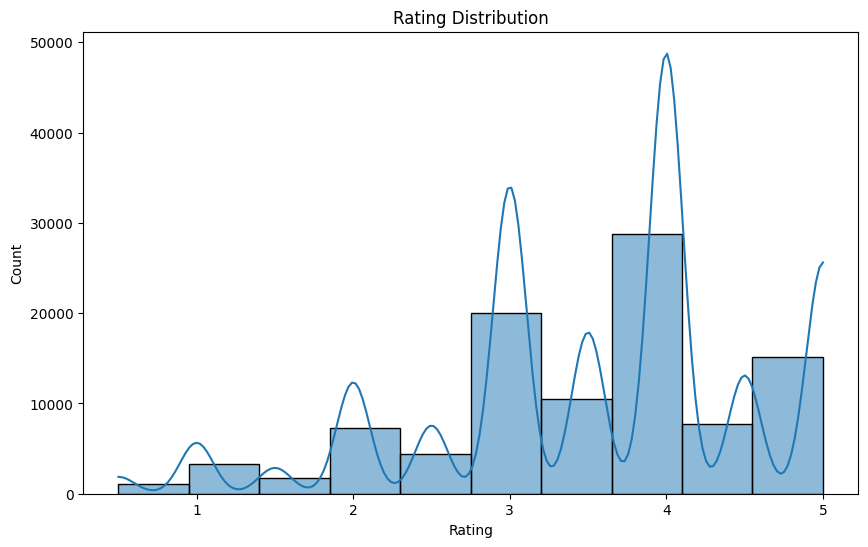

In [ ]:
# Visualizing rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(ratings_small['rating'], bins=10, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()
#kde=True: This adds a Kernel Density Estimate (KDE) plot on top of the histogram. KDE is a way 
#to estimate the probability density function of a continuous random variable, providing a smooth curve representing
#the data distribution. This the curve we see on top of the histogram. Also took ratings_small , as if i took ratings, it was 
# taking more than 1 min to process 


In [12]:
# Define a function to combine text features , to increase the content on which content filtering operates
def combine_features(row):
    features = [
        'keywords', 'cast', 'crew', 'overview', 'genres', 'production_companies', 
        'production_countries', 'title', 'tagline', 'original_title', 'homepage', 
        'spoken_languages', 'status'
    ]
    combined = " ".join(str(row[feature]) for feature in features if feature in row)
    return combined

# Create a new column with combined features
merged_data['combined_features'] = merged_data.apply(combine_features, axis=1)

# Handle missing values in the combined_features column
merged_data['combined_features'] = merged_data['combined_features'].fillna('')

In [13]:
#using content filtering 
#there is a lot of data to process so it takes quite some time to actually work 
def content_filtering(merged_data, input_movie):
    # Create TF-IDF matrix for keywords
    tfidf = TfidfVectorizer(stop_words='english')
    merged_data['combined_features'] = merged_data['combined_features'].fillna('')
    tfidf_matrix = tfidf.fit_transform(merged_data['combined_features'])

    # Compute cosine similarity matrix
    cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

    # Get the index of the input movie
    idx = merged_data[merged_data['title'] == input_movie].index[0]

    # Get the pairwise similarity scores of all movies with the input movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar movies
    sim_scores = sim_scores[1:6]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Get the top 5 most similar movies
    top_movies = merged_data.iloc[movie_indices]['title'].tolist()

    return top_movies

# Example usage
input_movie = 'The Godfather'
top_recommendations = content_filtering(merged_data, input_movie)
print(f"Top 5 recommended movies for '{input_movie}':")
for i, movie in enumerate(top_recommendations, 1):
    print(f"{i}. {movie}")



Top 5 recommended movies for 'The Godfather':
1. The Godfather: Part II
2. The Godfather: Part III
3. The Dark Knight
4. The Dark Knight Rises
5. American Gangster


In [14]:


def collaborative_filtering_single_movie(ratings_file, input_movie_title, n_recommendations=5):
    # Load data from CSV file into a DataFrame
    ratings = pd.read_csv(ratings_file)
    
    # Create a unique mapping from movie titles to movie IDs
    movies = pd.read_csv('movies.csv')  # Assuming you have a movies.csv with 'movieId' and 'title' columns
    movie_id_map = dict(zip(movies['title'], movies['movieId']))
    
    # Ensure the input movie is in the dataset
    if input_movie_title not in movie_id_map:
        print(f"Movie '{input_movie_title}' not found in the dataset.")
        return []

    input_movie_id = movie_id_map[input_movie_title]

    # Load the data into a Surprise Dataset
    reader = Reader(rating_scale=(1, 5))
    data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

    # Train-test split
    trainset, _ = train_test_split(data, test_size=0.2)

    # Use KNNBasic algorithm for item-based collaborative filtering
    sim_options = {
        'name': 'cosine',
        'user_based': False  # Compute similarities between items
    }
    algo = KNNBasic(sim_options=sim_options)

    # Train the model on the trainset
    algo.fit(trainset)

    # Get the inner id for the input movie
    input_inner_id = algo.trainset.to_inner_iid(input_movie_id)

    # Get the top N similar items
    sim_items = algo.get_neighbors(input_inner_id, k=n_recommendations)

    # Map inner item ids back to raw item ids
    sim_item_raw_ids = [algo.trainset.to_raw_iid(inner_id) for inner_id in sim_items]

    # Map raw item ids back to movie titles
    reverse_movie_id_map = {v: k for k, v in movie_id_map.items()}
    sim_item_titles = [reverse_movie_id_map[raw_id] for raw_id in sim_item_raw_ids]

    return sim_item_titles

# Example usage
input_movie = 'The Godfather'
recommendations = collaborative_filtering_single_movie('ratings.csv', input_movie)
print(f"Top {len(recommendations)} recommended movies similar to '{input_movie}':")
for i, movie in enumerate(recommendations, 1):
    print(f"{i}. {movie}")



FileNotFoundError: [Errno 2] No such file or directory: 'movies.csv'

In [ ]:
#We can use the trained model (algo) to make recommendations for users or predict ratings for specific user-item pairs. 
def collaborative_filtering_single_movie(ratings, input_movie, n_recommendations=5):
    # Load data from CSV file into Surprise Dataset
    reader = Reader(line_format='user item rating', sep=',', rating_scale=(1, 5))
    data = Dataset.load_from_file(ratings, reader=reader)

    # Define the SVD algorithm
    algo = SVD()

    # Train the model on the entire dataset
    trainset = data.build_full_trainset()
    algo.fit(trainset)

    # Get the item id (iid) for the input movie
    input_iid = trainset.to_inner_iid(input_movie)

    # Get similar items using item similarity
    sim_items = algo.similar_items(input_iid, n_recommendations+1)  # Add 1 to exclude the input movie itself

    # Map inner item ids back to raw item ids
    sim_item_raw_ids = [trainset.to_raw_iid(inner_iid) for inner_iid, _ in sim_items]

    # Remove the input movie from the recommendations (if it's in the list)
    if input_movie in sim_item_raw_ids:
        sim_item_raw_ids.remove(input_movie)

    # Return the top N recommended movies
    return sim_item_raw_ids[:n_recommendations]

# Example usage
input_movie = 'The Godfather'
recommendations = collaborative_filtering_single_movie('ratings.csv', input_movie)
print(f"Top {len(recommendations)} recommended movies similar to '{input_movie}':")
for i, movie in enumerate(recommendations, 1):
    print(f"{i}. {movie}")




NameError: name 'Reader' is not defined

In [ ]:
# using both content filtering and collabarative filtering 
def get_recommendations_for_one_movie(merged_data, ratings, input_title):
    # Create TF-IDF matrix for keywords
    tfidf = TfidfVectorizer(stop_words='english')
    merged_data['combined_features'] = merged_data['combined_features'].fillna('')
    tfidf_matrix = tfidf.fit_transform(merged_data['combined_features'])

    # Compute cosine similarity matrix
    cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

    # Integrate sentiment scores into the cosine similarity matrix
    sentiment_scores = movies_metadata['sentiment_score'].values
    adjusted_cosine_sim = cosine_sim * sentiment_scores[:, np.newaxis]

    # Get the index of the input movie
    idx = merged_data[merged_data['title'] == input_title].index[0]

    # Get the pairwise similarity scores of all movies with the input movie
    sim_scores = list(enumerate(adjusted_cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar movies
    sim_scores = sim_scores[1:6]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Get popularity scores of recommended movies
    popularity = ratings.groupby('movieId')['popularity'].max()  # Calculate popularity again
    popularity_scores = popularity.iloc[movie_indices]['popularity'].values

    # Adjust similarity scores with popularity scores
    sim_scores_popularity_adjusted = [sim_scores[i][1] * popularity_scores[i] for i in range(len(sim_scores))]

    # Sort the adjusted scores
    sim_scores_popularity_adjusted = sorted(zip(movie_indices, sim_scores_popularity_adjusted), key=lambda x: x[1], reverse=True)

    # Get the top 5 most similar movies with popularity adjustment
    top_movies = [merged_data.iloc[score[0]]['title'] for score in sim_scores_popularity_adjusted[:5]]

    return top_movies

# Example usage
input_movie = 'The Godfather'
recommendations = get_recommendations_for_one_movie(merged_data, ratings, input_movie)
print(f"Top {len(recommendations)} recommended movies similar to '{input_movie}':")
for i, movie in enumerate(recommendations, 1):
    print(f"{i}. {movie}")


In [ ]:
#We can see the top 5 movies predicted for the user on the basis of the latest movie they watched or simply the movie chosen by them 
#by each method- content_filtering , collabarative_function , get_recommendations_for_one movie function to see which suits us better
# or we can use something like the collabarative_filtering2 function to predict customised rating of the movie
# according to the user's chosen movie

In [ ]:
#comparison of the top 5 movies recommended by different methods 
input_movie = input("Enter the movie name so that you can get recommended similar movies :")
# Suppose 'content_recommendations', 'collaborative_recommendations', and 'custom_recommendations' are lists of top 5 recommended movies for each method
content_recommendations = content_filtering(merged_data, input_movie)
collaborative_recommendations = collaborative_filtering(ratings, input_movie, n_recommendations=5)
custom_recommendations =  get_recommendations_for_one_movie(merged_data, ratings, input_movie)
collaborative_recommendations2 =collaborative_filtering_single_movie(ratings, input_movie, n_recommendations=5)

# Create a DataFrame to store the recommendations
df = pd.DataFrame({
    'Content Filtering': content_recommendations,
    'Collaborative Filtering': collaborative_recommendations,
    'Custom Recommender': custom_recommendations,
    'Collaborative Filtering-2': collaborative_recommendations2,
})

# Plotting the comparison using a bar chart
plt.figure(figsize=(10, 6))
df.plot(kind='bar', ax=plt.gca())
plt.xlabel('Top 5 Recommendations')
plt.ylabel('Movies')
plt.title('Comparison of Top 5 Recommended Movies')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Recommendation Method')
plt.tight_layout()
plt.show()